In [4]:
import glacierml as gl
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
df, ref = gl.notebook_data_loader()

glac = gl.data_loader(
    RGI_input = 'y',
    data_version = 'v2'
)

data = pd.merge(df, glac, on = 'RGIId', how = 'outer')

data = data.dropna()
data

Global Volume: 101.48, UB: 39.16, LB: 42.34, STD: 42.19
# of raw thicknesses: 500
# of raw thickness matched to RGI = 499, 445 unique


,Unnamed: 0,RGIId,Mean Thickness,Median Thickness,Thickness Std Dev,Shapiro-Wilk statistic,Shapiro-Wilk p_value,IQR,Lower Bound,Upper Bound,Median Value,Total estimates,region_x,CenLat_x,CenLon_x,Slope_x,Zmin_x,Zmed_x,Zmax_x,Area_x,Aspect_x,Lmax_x,Zdelta,UB,LB,Edasi Volume,Volume Std Dev,CenLat_y,CenLon_y,Area_y,Zmin_y,Zmed_y,Zmax_y,Slope_y,Aspect_y,Lmax_y,Thickness,region_y,index_x,index_y,Centroid Distance
36,36.0,RGI60-01.00037,165.589315,166.046430,20.382341,0.977804,5.939409e-24,24.636735,17.696263,18.747401,166.046430,3811.0,01,63.469173,-146.528168,12.0,722.0,1841.0,3081.0,234.583,30.0,41911.0,2359.0,4.397821,4.151243,38.844438,4.781351,63.469173,-146.528168,234.583,722.0,1841.0,3081.0,12.0,30.0,41911.0,235.0,01,36.0,201.0,1.851481
569,569.0,RGI60-01.00570,78.666618,79.626350,9.811829,0.975697,5.307208e-25,12.192095,9.108617,8.875617,79.626350,3811.0,01,63.281000,-145.427000,14.0,1162.0,1858.0,2438.0,17.567,172.0,8639.0,1276.0,0.155918,0.160011,1.381936,0.172364,63.281000,-145.427000,17.567,1162.0,1858.0,2438.0,14.0,172.0,8639.0,147.0,01,569.0,247.0,0.707576
1103,1103.0,RGI60-01.01104,81.079888,81.399414,10.433124,0.994151,2.776715e-11,13.579535,10.294491,10.070715,81.399414,3811.0,01,58.380000,-134.349000,10.0,676.0,1123.0,1494.0,9.528,327.0,6332.0,818.0,0.095954,0.098086,0.772529,0.099407,58.380000,-134.349000,9.528,676.0,1123.0,1494.0,10.0,327.0,6332.0,66.0,01,1103.0,33.0,0.643556
2235,2235.0,RGI60-01.02236,20.441688,20.158743,5.413321,0.959235,1.921387e-31,6.320782,4.857410,4.467055,20.158743,3811.0,01,69.276000,-143.819000,22.0,2360.0,2440.0,2554.0,0.153,219.0,680.0,194.0,0.000683,0.000743,0.003128,0.000828,69.276000,-143.819000,0.153,2360.0,2440.0,2554.0,22.0,219.0,680.0,82.0,01,2235.0,231.0,0.622846
10674,10674.0,RGI60-01.10679,25.329500,24.506273,9.943259,0.898534,1.121039e-44,9.769386,7.998610,7.133909,24.506273,3811.0,01,61.107000,-147.007000,26.0,619.0,661.0,720.0,0.041,57.0,-9.0,101.0,0.000292,0.000328,0.001039,0.000408,61.107000,-147.007000,0.041,619.0,661.0,720.0,26.0,57.0,-9.0,277.0,01,10674.0,200.0,5.549550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214718,214718.0,RGI60-19.01012,95.468887,94.065400,24.464127,0.994725,1.621762e-10,32.999472,23.691542,24.144044,94.065400,3811.0,19,-65.052700,-63.393600,0.0,10.0,-999.0,50.0,0.213,-9.0,318.0,40.0,0.005143,0.005046,0.020335,0.005211,-65.052700,-63.393600,0.213,10.0,-999.0,50.0,0.0,-9.0,318.0,312.0,19,214760.0,590.0,77.370878
215656,215656.0,RGI60-19.01950,84.250825,83.343960,22.751910,0.994842,2.358858e-10,30.705737,22.275985,22.147174,83.343960,3811.0,19,-62.047200,-58.376500,7.4,30.0,-999.0,630.0,7.240,150.0,5187.0,600.0,0.160346,0.161278,0.609976,0.164724,-62.047200,-58.376500,7.240,30.0,-999.0,630.0,7.4,150.0,5187.0,238.0,19,215698.0,252.0,2.079114
215764,215764.0,RGI60-19.02058,62.617045,61.429955,19.321411,0.990581,3.224693e-15,25.320712,18.561724,18.377282,61.429955,3811.0,19,-62.675200,-60.390600,10.0,10.0,-999.0,370.0,1.160,260.0,1118.0,360.0,0.021318,0.021532,0.072636,0.022413,-62.675200,-60.390600,1.160,10.0,-999.0,370.0,10.0,260.0,1118.0,89.0,19,215806.0,251.0,1.013640
215765,215765.0,RGI60-19.02059,75.873357,74.508286,21.562119,0.992350,2.028728e-13,28.888723,21.103049,21.092868,74.508286,3811.0,19,-62.670700,-60.354700,6.7,10.0,-999.0,370.0,5.493,273.0,3056.0,360.0,0.115863,0.115919,0.416772,0.118441,-62.670700,-60.354700,5.493,10.0,-999.0,370.0,6.7,273.0,3056.0,97.0,19,215807.0,250.0,0.193860


# Density plot of E&L vs GlaThiDa mean thickness

Sorting data...
Calculating point density...


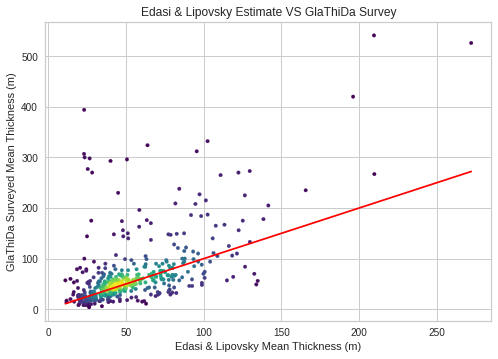

In [22]:
from scipy.stats import gaussian_kde

data_1 = data['Mean Thickness']
data_2 = data['Thickness']

# data_1 = ref['Farinotti Mean Thickness'] / 1e3 * ref['Area']
# data_2 = ref['Edasi Mean Thickness'] / 1e3 * ref['Area']

print('Sorting data...')
x_1 = np.sort(data_1)
y_1 = 1. * np.arange(len(data_1)) / (len(data_1) - 1)

x_2 = np.sort(data_2)
y_2 = 1. * np.arange(len(data_2)) / (len(data_2) - 1)

print('Calculating point density...')
# Calculate the point density
xy = np.vstack([np.log10(data_1),np.log10(data_2)])

z = gaussian_kde(xy)(xy)


plt.scatter(
    data_1,
    data_2,
    marker = '.',
    c = (z),
    cmap = 'viridis'
)
# plt.axis('square')
plt.plot(
    (data['Mean Thickness'].min(), data['Mean Thickness'].max()),
    (data['Mean Thickness'].min(), data['Mean Thickness'].max()),
    color = 'red',
    linestyle = '-'
)
plt.title('Edasi & Lipovsky Estimate VS GlaThiDa Survey')
plt.xlabel('Edasi & Lipovsky Mean Thickness (m)')
plt.ylabel('GlaThiDa Surveyed Mean Thickness (m)')

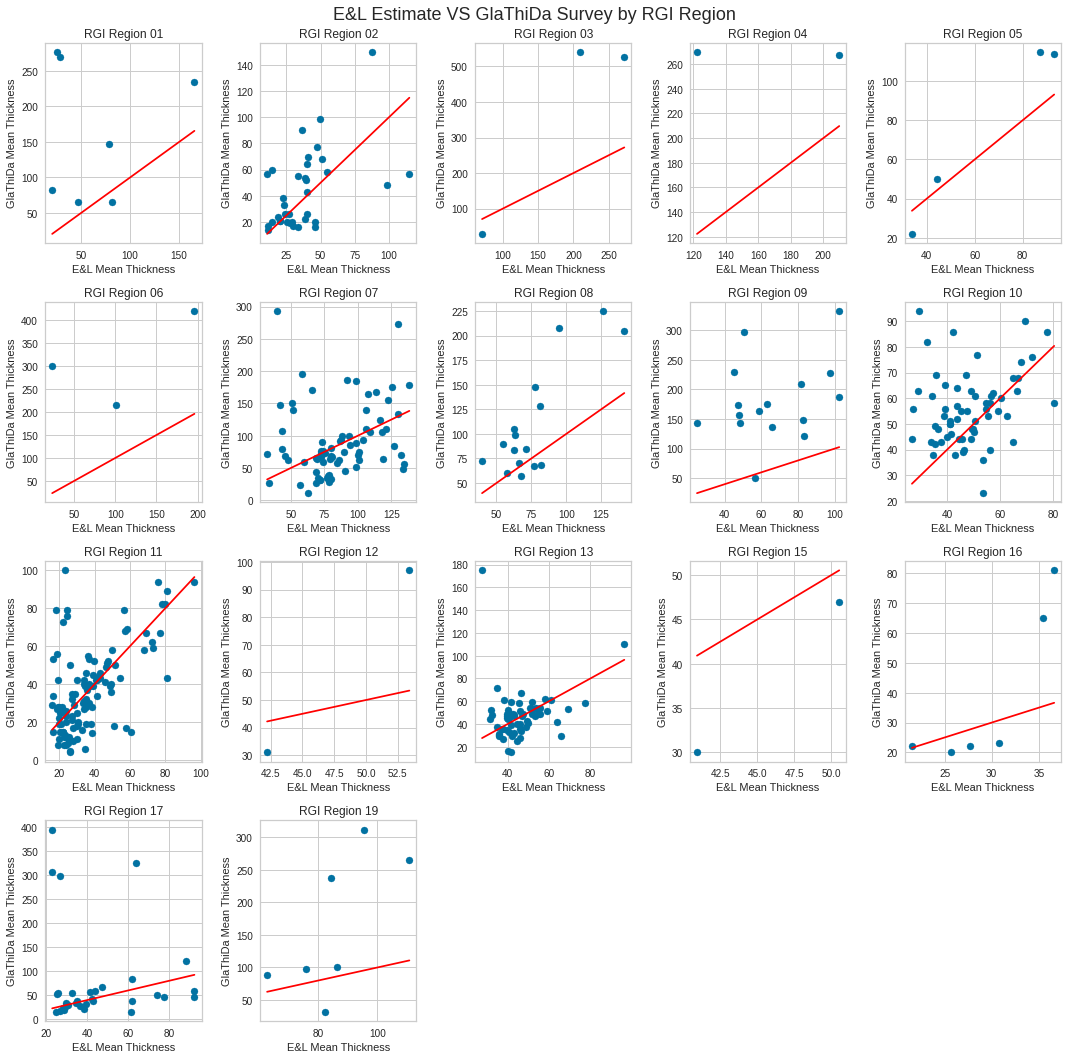

In [25]:
fig,ax=plt.subplots(1,1,figsize=(15,15))
for n, reg in enumerate(data['region_x'].unique()):
    dft = data[data['region_x'] == reg]
    data_1 = dft['Mean Thickness'],
    data_2 = dft['Thickness']
    ax = plt.subplot(4,5,n+1)
    ax.set_ylabel('GlaThiDa Mean Thickness')
    ax.set_xlabel('E&L Mean Thickness')
    ax.set_title('RGI Region ' + reg)
    plt.scatter(
        data_1,
        data_2,
#         marker = '.',
#         c = (z),
#         cmap = 'viridis'
    )
    # plt.axis('square')
    plt.plot(
        (dft['Mean Thickness'].min(), dft['Mean Thickness'].max()),
        (dft['Mean Thickness'].min(), dft['Mean Thickness'].max()),
        color = 'red',
        linestyle = '-'
    )
plt.suptitle('E&L Estimate VS GlaThiDa Survey by RGI Region', fontsize = 18)
plt.tight_layout()

# Do these terrible underestimated glaciers have anything in common?

In [70]:
data['Thickness Difference'] = abs(data['Mean Thickness'] - data['Thickness'])

In [97]:
data = data.sort_values('Thickness Difference', ascending = False)
data

,Unnamed: 0,RGIId,Mean Thickness,Median Thickness,Thickness Std Dev,Shapiro-Wilk statistic,Shapiro-Wilk p_value,IQR,Lower Bound,Upper Bound,Median Value,Total estimates,region_x,CenLat_x,CenLon_x,Slope_x,Zmin_x,Zmed_x,Zmax_x,Area_x,Aspect_x,Lmax_x,Zdelta,UB,LB,Edasi Volume,Volume Std Dev,CenLat_y,CenLon_y,Area_y,Zmin_y,Zmed_y,Zmax_y,Slope_y,Aspect_y,Lmax_y,Thickness,region_y,index_x,index_y,Centroid Distance,Thickness Difference
202238,202238.0,RGI60-17.07977,23.028577,21.509737,11.269031,0.967458,1.531017e-28,14.426096,10.747780,10.927670,21.509737,3811.0,17,-47.060600,-73.296300,31.5,1197.0,1430.0,1580.0,0.292,149.0,779.0,383.0,0.003191,0.003138,0.006724,0.003291,-47.060600,-73.296300,0.292,1197.0,1430.0,1580.0,31.5,149.0,779.0,394.0,17,202280.0,405.0,3.581989,370.971423
46075,46075.0,RGI60-03.00113,209.554677,210.288220,84.714708,0.995945,1.055922e-08,105.534260,80.810403,80.732056,210.288220,3811.0,03,80.537300,-75.358800,6.3,0.0,1446.0,2074.0,999.861,323.0,71606.0,2074.0,80.720835,80.799171,209.525549,84.702932,80.537300,-75.358800,999.861,0.0,1446.0,2074.0,6.3,323.0,71606.0,541.0,03,46075.0,209.0,16.705577,331.445323
202113,202113.0,RGI60-17.07852,22.957124,21.689043,10.635421,0.975507,4.303137e-25,13.999897,10.376271,10.415082,21.689043,3811.0,17,-47.217100,-73.107800,26.8,1401.0,1522.0,1682.0,0.308,171.0,659.0,281.0,0.003208,0.003196,0.007071,0.003276,-47.217100,-73.107800,0.308,1401.0,1522.0,1682.0,26.8,171.0,659.0,307.0,17,202155.0,404.0,0.592503,284.042876
78615,78615.0,RGI60-06.00438,23.318010,22.455187,8.124976,0.863921,0.000000e+00,7.752488,6.459886,5.509544,22.455187,3811.0,06,64.460300,-15.611600,21.9,607.0,697.0,814.0,0.220,108.0,697.0,207.0,0.001212,0.001421,0.005130,0.001787,64.460300,-15.611600,0.220,607.0,697.0,814.0,21.9,108.0,697.0,300.0,06,78632.0,267.0,2.971305,276.681990
199109,199109.0,RGI60-17.04848,26.563002,25.178692,11.743548,0.977156,2.775966e-24,15.038831,11.404942,11.464731,25.178692,3811.0,17,-51.191900,-73.372100,31.4,836.0,1242.0,1468.0,0.566,132.0,1055.0,632.0,0.006489,0.006455,0.015035,0.006647,-51.191900,-73.372100,0.566,836.0,1242.0,1468.0,31.4,132.0,1055.0,298.0,17,199151.0,408.0,3.821274,271.436998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86677,86677.0,RGI60-10.01842,60.151750,60.748540,4.628552,0.675366,0.000000e+00,2.684656,1.629475,2.847199,60.748540,3811.0,10,49.825649,87.594131,22.4,2643.0,2987.0,3853.0,4.094,326.0,2892.0,1210.0,0.011656,0.006671,0.246261,0.018949,49.825649,87.594131,4.094,2643.0,2987.0,3853.0,22.4,326.0,2892.0,60.0,10,86705.0,335.0,0.000134,0.151750
90144,90144.0,RGI60-11.00161,43.121294,43.386604,3.104130,0.628786,0.000000e+00,2.088110,1.168730,1.992212,43.386604,3811.0,11,47.095300,12.358200,17.6,2625.0,3198.0,3621.0,3.240,203.0,3026.0,996.0,0.006455,0.003787,0.139713,0.010057,47.095300,12.358200,3.240,2625.0,3198.0,3621.0,17.6,203.0,3026.0,43.0,11,90175.0,495.0,0.271443,0.121294
102159,102159.0,RGI60-13.06361,52.939019,53.159220,2.967698,0.912415,2.132776e-42,2.927956,2.224504,2.382458,53.159220,3811.0,13,42.140310,78.272803,21.2,3328.0,3844.0,4361.0,2.046,358.0,3378.0,1033.0,0.004875,0.004551,0.108313,0.006072,42.140310,78.272803,2.046,3328.0,3844.0,4361.0,21.2,358.0,3378.0,53.0,13,102190.0,42.0,0.000273,0.060981
104422,104422.0,RGI60-13.08624,46.957463,47.008232,2.331815,0.896418,5.605194e-45,2.074639,1.538389,1.755424,47.008232,3811.0,13,43.043653,77.080587,19.1,3427.0,3764.0,4185.0,2.838,359.0,3131.0,758.0,0.004982,0.004366,0.133265,0.006618,43.043653,77.080587,2.838,3427.0,3764.0,4185.0,19.1,359.0,3131.0,47.0,13,104453.0,628.0,0.000025,0.042537


In [146]:
print("'" + str(np.round(data['Mean Thickness'].tail(111).median(),2)) + "',")
print("'" + str(np.round(data['Thickness'].tail(111).median(),2)) + "',")
print("'" + str(np.round(data['Area_x'].tail(111).median(),2)) + "',")
print("'" + str(np.round(data['Slope_x'].tail(111).median(),2)) + "',")
print("'" + str(np.round(data['Lmax_x'].tail(111).median(),2)) + "',")


'43.26',
'45.0',
'2.02',
'17.7',
'2472.0',


In [157]:
residual_stats = pd.DataFrame(
{
    'Feature':[
        'E&L Mean Thickness', 'GlaThiDa Mean Thickness',
        'Area (km^2)', 'Slope(deg)','Maximum Length (m)',
        'Median Elevation (m)', 'Maximum Elevation (m)'
    ],
    '25% highest residuals mean feature value':[
        '75.23',
        '142.46',
        '139.45',
        '15.14',
        '10470.82',
        '1397.85',
        '1768.2',


    ],
    '25% lowest residuals mean feature value':[
        '47.2',
        '47.66',
        '5.28',
        '18.21',
        '3149.48',
        '2915.38',
        '3283.69',


        
    ],
    '25% highest residuals median feature value':[
        '70.37',
        '121.0',
        '6.77',
        '13.2',
        '4735.0',
        '706.0',
        '1026.0',


    ],
    '25% lowest residual median feature value':[
        '43.26',
        '45.0',
        '2.02',
        '17.7',
        '2472.0',
        '3079.0',
        '3409.0',


    ],
    '25% highest residual std feature value':[
        '45.44',
        '106.75',
        '411.11',
        '8.7',
        '14378.32',
        '1438.99',
        '1479.58',


    ],
    '25% lowest residual std feature value':[
        '20.39',
        '20.75',
        '16.17',
        '5.23',
        '3309.28',
        '1076.35',
        '1111.82',


    ],
}
)
residual_stats

,Feature,25% highest residuals mean feature value,25% lowest residuals mean feature value,25% highest residuals median feature value,25% lowest residual median feature value,25% highest residual std feature value,25% lowest residual std feature value
0,E&L Mean Thickness,75.23,47.2,70.37,43.26,45.44,20.39
1,GlaThiDa Mean Thickness,142.46,47.66,121.0,45.0,106.75,20.75
2,Area (km^2),139.45,5.28,6.77,2.02,411.11,16.17
3,Slope(deg),15.14,18.21,13.2,17.7,8.7,5.23
4,Maximum Length (m),10470.82,3149.48,4735.0,2472.0,14378.32,3309.28
5,Median Elevation (m),1397.85,2915.38,706.0,3079.0,1438.99,1076.35
6,Maximum Elevation (m),1768.2,3283.69,1026.0,3409.0,1479.58,1111.82


In [156]:
print("'" + str(np.round(data['Zmax_x'].head(111).mean(),2)) + "',")
print("'" + str(np.round(data['Zmax_x'].tail(111).mean(),2)) + "',")
print("'" + str(np.round(data['Zmax_x'].head(111).median(),2)) + "',")
print("'" + str(np.round(data['Zmax_x'].tail(111).median(),2)) + "',")
print("'" + str(np.round(data['Zmax_x'].head(111).std(),2)) + "',")
print("'" + str(np.round(data['Zmax_x'].tail(111).std(),2)) + "',")


'1768.2',
'3283.69',
'1026.0',
'3409.0',
'1479.58',
'1111.82',


In [108]:
data['Area_x'].head(100).median()

6.923

In [109]:
data['Area_x'].tail(100).median()

2.114

In [47]:
data['Thickness Difference'].mean()

-16.65224727813649

In [48]:
data['Thickness Difference'].std()

58.064747091966474

# Build regional statistics difference table

In [ ]:


for reg in data['region_x'].unique():
    dft = data[data['region_x'] == reg]
    
    mean_e = dft['Mean Thickness'].mean()
    mean_g = dft['Thickness'].mean()
    mean_diff = mean_e - mean_g

    median_e = dft['Mean Thickness'].median()
    median_g = dft['Thickness'].median()
    median_diff = median_e - median_g
    
    std_e = dft['Mean Thickness'].std()
    std_g = dft['Thickness'].std()
    std_diff = std_e - std_g
    print("'" + str(np.round(std_diff, 3)) + "'" + ',')
#     print(f'Region: {reg} mean diff {mean_diff} median diff {median_diff} std {std_diff}')
    
#     print(str(dft['Mean Thickness'].mean() - dft['Thickness']) + ',')

In [110]:
stats = pd.DataFrame({
    'RGI Region':['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '15', '16', '17', '19'],
    'Mean':[
        '-99.493',
        '-5.967',
        '-181.232',
        '-102.456',
        '-10.553',
        '-204.738',
        '-5.819',
        '-34.129',
        '-114.815',
        '-7.67',
        '-0.16',
        '-16.18',
        '-1.181',
        '7.233',
        '-9.208',
        '-34.348',
        '-76.491',
    ],
    'Median':[
        '-99.758',
        '0.351',
        '-316.445',
        '-102.456',
        '-16.094',
        '-198.638',
        '5.88',
        '-18.179',
        '-107.61',
        '-8.286',
        '1.951',
        '-16.18',
        '-3.722',
        '7.233',
        '6.731',
        '-6.502',
        '-15.749',
    ],
    'STD':[
        '-44.685',
        '-6.582',
        '-188.27',
        '59.719',
        '-16.758',
        '-16.469',
        '-28.889',
        '-30.327',
        '-44.674',
        '-1.759',
        '-4.873',
        '-38.759',
        '-10.242',
        '-5.215',
        '-21.169',
        '-78.535',
        '-92.274',
    ],
})
stats

,RGI Region,Mean,Median,STD
0,01,-99.493,-99.758,-44.685
1,02,-5.967,0.351,-6.582
2,03,-181.232,-316.445,-188.27
3,04,-102.456,-102.456,59.719
4,05,-10.553,-16.094,-16.758
5,06,-204.738,-198.638,-16.469
6,07,-5.819,5.88,-28.889
7,08,-34.129,-18.179,-30.327
8,09,-114.815,-107.61,-44.674
9,10,-7.67,-8.286,-1.759


In [ ]:
for reg in data['region_x'].unique():
    dft = data[data['region_x'] == reg]
    
    mean_e = dft['Mean Thickness']
    mean_g = dft['Thickness']
    me_mg = mean_e - mean_g
    
    mean_diff = me_mg.mean()

    median_diff = me_mg.median()
    
    std_diff = me_mg.std()
#     print('Mean')
#     print("'" + str(np.round(mean_diff, 3)) + "'" + ',')
#     print('')
#     print('Median')
#     print("'" + str(np.round(median_diff, 3)) + "'" + ',')
#     print('')
#     print('STD')
    print("'" + str(np.round(std_diff, 3)) + "'" + ',')


#     print(f'Region: {reg} mean diff {mean_diff} median diff {median_diff} std {std_diff}')
    
#     print(str(dft['Mean Thickness'].mean() - dft['Thickness']) + ',')

In [ ]:
stats1 = pd.DataFrame({
    'RGI Region':['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '15', '16', '17', '19'],
    'Mean':[
        '-99.493',
        '-5.967',
        '-181.232',
        '-102.456',
        '-10.553',
        '-204.738',
        '-5.819',
        '-34.129',
        '-114.815',
        '-7.67',
        '-0.16',
        '-16.18',
        '-1.181',
        '7.233',
        '-9.208',
        '-34.348',
        '-76.491',
    ],
    'Median':[
        '-68.333',
        '-3.429',
        '-253.909',
        '-102.456',
        '-13.238',
        '-223.895',
        '5.226',
        '-33.64',
        '-110.334',
        '-5.192',
        '1.654',
        '-16.18',
        '1.39',
        '7.233',
        '2.629',
        '1.098',
        '-26.383',
    ],
    'STD':[
        '105.173',
        '27.0',
        '196.884',
        '63.962',
        '17.493',
        '83.193',
        '56.587',
        '37.947',
        '64.304',
        '16.503',
        '18.771',
        '38.759',
        '22.695',
        '5.215',
        '22.189',
        '103.894',
        '97.643',
    ],
})
stats1

In [ ]:
stats.to_latex(index = False, multirow = True)